# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
# env = UnityEnvironment(file_name="/home/arasdar/unity-envs/Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Banana_Linux_NoVis/Banana.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
for steps in range(1111111):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score and steps: {} and {}".format(score, steps))

(37,)
Score and steps: 0.0 and 299


When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


In [10]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [11]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


In [12]:
batch[0], batch[0][1].shape

([3, array([1.        , 0.        , 0.        , 0.        , 0.41103721,
         0.        , 1.        , 0.        , 0.        , 0.40960541,
         0.        , 0.        , 1.        , 0.        , 0.04057696,
         1.        , 0.        , 0.        , 0.        , 0.253993  ,
         0.        , 1.        , 0.        , 0.        , 0.30345654,
         1.        , 0.        , 0.        , 0.        , 0.19119175,
         0.        , 1.        , 0.        , 0.        , 0.3996276 ,
         0.        , 0.        ]), 0.0, False], (37,))

In [13]:
batch[0][1].shape

(37,)

In [14]:
batch[0]

[3, array([1.        , 0.        , 0.        , 0.        , 0.41103721,
        0.        , 1.        , 0.        , 0.        , 0.40960541,
        0.        , 0.        , 1.        , 0.        , 0.04057696,
        1.        , 0.        , 0.        , 0.        , 0.253993  ,
        0.        , 1.        , 0.        , 0.        , 0.30345654,
        1.        , 0.        , 0.        , 0.        , 0.19119175,
        0.        , 1.        , 0.        , 0.        , 0.3996276 ,
        0.        , 0.        ]), 0.0, False]

In [15]:
states = np.array([each[1] for each in batch])
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [16]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
0.0 -1.0
10.761892318725586 -10.514747619628906


In [17]:
def model_input(state_size):
    #states = tf.placeholder(tf.float32, [None, *state_size], name='states')
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    rates = tf.placeholder(tf.float32, [None], name='rates')
    return states, actions, targetQs, rates

In [18]:
# Generator/Controller: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [19]:
# Discriminator/Dopamine: Reward function/planner/naviator/advisor/supervisor/cortical columns
def discriminator(states, actions, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=action_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        fused = tf.concat(axis=1, values=[nl1, actions])
        h2 = tf.layers.dense(inputs=fused, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
                
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=1)        
        #predictions = tf.nn.softmax(logits)

        # return rewards logits
        return logits

In [20]:
def model_loss(action_size, hidden_size, states, actions, targetQs, rates):
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    neg_log_prob = tf.nn.softmax_cross_entropy_with_logits_v2(logits=actions_logits, 
                                                              labels=actions_labels)
    targetQs = tf.reshape(targetQs, shape=[-1, 1])
    gloss = tf.reduce_mean(neg_log_prob * targetQs) # DPG: r+(gamma*nextQ)
    gQs = discriminator(actions=actions_logits, hidden_size=hidden_size, states=states)
    dQs = discriminator(actions=actions_labels, hidden_size=hidden_size, states=states, reuse=True) # Qs
    rates = tf.reshape(rates, shape=[-1, 1])
    dlossA = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=gQs, # GAN
                                                                    labels=rates)) # 0-1
    dlossA += tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dQs, # GAN
                                                                     labels=rates)) # 0-1
    dlossA /= 2
    dlossQ = tf.reduce_mean(tf.square(gQs - targetQs)) # DQN
    dlossQ += tf.reduce_mean(tf.square(dQs - targetQs)) # DQN
    dlossQ /= 2
    return actions_logits, gQs, gloss, dlossA, dlossQ

In [21]:
# Optimizating/training/learning G & D
def model_opt(g_loss, d_lossA, d_lossQ, g_learning_rate, d_learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        g_opt = tf.train.AdamOptimizer(g_learning_rate).minimize(g_loss, var_list=g_vars)
        d_optA = tf.train.AdamOptimizer(d_learning_rate).minimize(d_lossA, var_list=d_vars)
        d_optQ = tf.train.AdamOptimizer(d_learning_rate).minimize(d_lossQ, var_list=d_vars)

    return g_opt, d_optA, d_optQ

In [22]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, g_learning_rate, d_learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs, self.rates = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.Qs_logits, self.g_loss, self.d_lossA, self.d_lossQ = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, 
            targetQs=self.targetQs, rates=self.rates) # model input
        
        # Update the model: backward pass and backprop
        self.g_opt, self.d_optA, self.d_optQ = model_opt(g_loss=self.g_loss, 
                                                         d_lossA=self.d_lossA, 
                                                         d_lossQ=self.d_lossQ, 
                                                         g_learning_rate=g_learning_rate, 
                                                         d_learning_rate=d_learning_rate)

In [23]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size) # data batch

In [24]:
# env.observation_space, env.action_space
env_info.agents, env_info.vector_observations.shape

([776], (1, 37))

In [25]:
brain.vector_observation_space_size, brain.vector_action_space_size

(37, 4)

In [26]:
# Exploration parameters
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01           # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Network parameters
state_size = 37
action_size = 4
hidden_size = 37*2             # number of units in each Q-network hidden layer
g_learning_rate = 1e-4         # Q-network learning rate
d_learning_rate = 1e-4         # Q-network learning rate

# Memory parameters
memory_size = int(1e5)            # memory capacity
batch_size = int(1e2)             # experience mini-batch size: 300 steps for an episode size
gamma = 0.99                   # future reward discount

In [27]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, state_size=state_size, hidden_size=hidden_size,
              g_learning_rate=g_learning_rate, d_learning_rate=d_learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

In [28]:
# goal = +13
#state = env.reset()
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]   # get the state
total_reward = 0
num_step = 0
for _ in range(memory_size):
    # action = env.action_space.sample()
    # next_state, reward, done, _ = env.step(action)
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([state, action, next_state, reward, float(done), -1])
    num_step += 1 # memory incremented
    total_reward += reward
    state = next_state
    if done is True:
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the state
        # -13, +13: scaliing to 0-1
        rate = (total_reward+13)/26
        if rate < 0: rate=0
        if rate > +1: rate=1
        total_reward = 0 # reset
        for idx in range(num_step): # episode length
            if memory.buffer[-1-idx][-1] == -1:
                memory.buffer[-1-idx][-1] = rate
        num_step = 0 # reset

In [29]:
idx = np.random.choice(np.arange(memory_size// batch_size))
batch = np.array(memory.buffer)[idx*batch_size:(idx+1)*batch_size]
rates = np.array([each[5] for each in batch])
batch = batch[rates >= (np.max(rates)*0.9)]
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])
rates = np.array([each[5] for each in batch])

In [30]:
batch.shape, \
states.shape, actions.shape, next_states.shape, rewards.shape, dones.shape, rates.shape

((100, 6), (100, 37), (100,), (100, 37), (100,), (100,), (100,))

In [31]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list = [] # goal
rewards_list, gloss_list, dlossA_list, dlossQ_list = [], [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window

    # Training episodes/epochs
    for ep in range(1111):
        gloss_batch, dlossA_batch, dlossQ_batch= [], [], []
        #state = env.reset() # each episode
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the state
        num_step = 0 # each episode
        total_reward = 0 # each episode

        # Training steps/batches
        while True:
            # Explore (Env) or Exploit (Model)
            total_step += 1
            explore_p = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * total_step) 
            if explore_p > np.random.rand():
                #action = env.action_space.sample()
                action = np.random.randint(action_size)        # select an action
                #print(action)
            else:
                action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
                action = np.argmax(action_logits) # adding epsilon*noise
                #print(action)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([state, action, next_state, reward, float(done), -1])
            num_step += 1 # momory added
            total_reward += reward
            state = next_state
            
            # Rating the last played episode
            if done is True:
                # -13, +13: scaliing to 0-1
                rate = (total_reward+13)/26
                if rate < 0: rate=0
                if rate > +1: rate=1
                for idx in range(num_step): # episode length
                    if memory.buffer[-1-idx][5] == -1: # double-check if it is empty and it is not rated!
                        memory.buffer[-1-idx][5] = rate # rate each SA pair
            
            # Training using a max rated batch
            while True:
                idx = np.random.choice(np.arange(memory_size// batch_size))
                batch = np.array(memory.buffer)[idx*batch_size:(idx+1)*batch_size]
                rates = np.array([each[5] for each in batch])
                if (np.max(rates)*0.9) > 0: # non-rated data -1
                    break
            batch = batch[rates >= (np.max(rates)*0.9)]
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            rates = np.array([each[5] for each in batch])            
            #print(states.shape, actions.shape, next_states.shape, rewards.shape, dones.shape, rates.shape)
            nextQs_logits = sess.run(model.Qs_logits, feed_dict = {model.states: next_states})
            #nextQs = np.max(nextQs_logits, axis=1) * (1-dones) # DQN
            nextQs = nextQs_logits.reshape([-1]) * (1-dones) # DPG
            targetQs = rewards + (gamma * nextQs)
            gloss, dlossA, dlossQ, _, _, _ = sess.run([model.g_loss, model.d_lossA, model.d_lossQ, 
                                                       model.g_opt, model.d_optA, model.d_optQ],
                                                      feed_dict = {model.states: states, 
                                                                   model.actions: actions,
                                                                   model.targetQs: targetQs, 
                                                                   model.rates: rates})
            gloss_batch.append(gloss)
            dlossA_batch.append(dlossA)
            dlossQ_batch.append(dlossQ)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{:.4f}'.format(total_reward),
              'rate:{:.4f}'.format(rate),
              'gloss:{:.4f}'.format(np.mean(gloss_batch)),
              'dlossA:{:.4f}'.format(np.mean(dlossA_batch)),
              'dlossQ:{:.4f}'.format(np.mean(dlossQ_batch)),
              'exploreP:{:.4f}'.format(explore_p))

        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        gloss_list.append([ep, np.mean(gloss_batch)])
        dlossA_list.append([ep, np.mean(dlossA_batch)])
        dlossQ_list.append([ep, np.mean(dlossQ_batch)])
        
        # Break episode/epoch loop
        ## Option 1: Solve the First Version
        #The task is episodic, and in order to solve the environment, 
        #your agent must get an average score of +30 over 100 consecutive episodes.
        if np.mean(episode_reward) >= +13:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:-2.0000 R:-2.0000 rate:0.4231 gloss:-0.0349 dlossA:0.6945 dlossQ:0.0183 exploreP:0.9707
Episode:1 meanR:0.0000 R:2.0000 rate:0.5769 gloss:-0.0596 dlossA:0.6936 dlossQ:0.0092 exploreP:0.9423
Episode:2 meanR:0.0000 R:0.0000 rate:0.5000 gloss:0.1017 dlossA:0.6933 dlossQ:0.0075 exploreP:0.9148
Episode:3 meanR:-0.2500 R:-1.0000 rate:0.4615 gloss:0.0301 dlossA:0.6931 dlossQ:0.0063 exploreP:0.8881
Episode:4 meanR:-0.2000 R:0.0000 rate:0.5000 gloss:0.0060 dlossA:0.6932 dlossQ:0.0080 exploreP:0.8621
Episode:5 meanR:-0.3333 R:-1.0000 rate:0.4615 gloss:0.0025 dlossA:0.6932 dlossQ:0.0049 exploreP:0.8369
Episode:6 meanR:-0.1429 R:1.0000 rate:0.5385 gloss:0.0073 dlossA:0.6932 dlossQ:0.0063 exploreP:0.8125
Episode:7 meanR:-0.2500 R:-1.0000 rate:0.4615 gloss:0.0094 dlossA:0.6931 dlossQ:0.0048 exploreP:0.7888
Episode:8 meanR:-0.1111 R:1.0000 rate:0.5385 gloss:0.0416 dlossA:0.6931 dlossQ:0.0064 exploreP:0.7657
Episode:9 meanR:0.1000 R:2.0000 rate:0.5769 gloss:0.0554 dlossA:0.6930 dlossQ:

Episode:81 meanR:0.9878 R:1.0000 rate:0.5385 gloss:0.1265 dlossA:0.6925 dlossQ:0.0063 exploreP:0.0946
Episode:82 meanR:1.0000 R:2.0000 rate:0.5769 gloss:0.1121 dlossA:0.6924 dlossQ:0.0060 exploreP:0.0921
Episode:83 meanR:1.0119 R:2.0000 rate:0.5769 gloss:0.1220 dlossA:0.6929 dlossQ:0.0087 exploreP:0.0897
Episode:84 meanR:1.0235 R:2.0000 rate:0.5769 gloss:0.1227 dlossA:0.6924 dlossQ:0.0058 exploreP:0.0873
Episode:85 meanR:1.0233 R:1.0000 rate:0.5385 gloss:0.1169 dlossA:0.6924 dlossQ:0.0059 exploreP:0.0850
Episode:86 meanR:1.0115 R:0.0000 rate:0.5000 gloss:0.1175 dlossA:0.6924 dlossQ:0.0072 exploreP:0.0828
Episode:87 meanR:1.0000 R:0.0000 rate:0.5000 gloss:0.1471 dlossA:0.6917 dlossQ:0.0063 exploreP:0.0806
Episode:88 meanR:1.0112 R:2.0000 rate:0.5769 gloss:0.1074 dlossA:0.6930 dlossQ:0.0046 exploreP:0.0786
Episode:89 meanR:0.9667 R:-3.0000 rate:0.3846 gloss:0.1303 dlossA:0.6925 dlossQ:0.0065 exploreP:0.0765
Episode:90 meanR:0.9560 R:0.0000 rate:0.5000 gloss:0.1199 dlossA:0.6924 dlossQ:0.

Episode:161 meanR:0.6600 R:2.0000 rate:0.5769 gloss:0.1226 dlossA:0.6924 dlossQ:0.0055 exploreP:0.0177
Episode:162 meanR:0.6400 R:-1.0000 rate:0.4615 gloss:0.0911 dlossA:0.6925 dlossQ:0.0059 exploreP:0.0174
Episode:163 meanR:0.6400 R:1.0000 rate:0.5385 gloss:0.1010 dlossA:0.6922 dlossQ:0.0067 exploreP:0.0172
Episode:164 meanR:0.6000 R:-1.0000 rate:0.4615 gloss:0.1165 dlossA:0.6923 dlossQ:0.0065 exploreP:0.0170
Episode:165 meanR:0.5900 R:2.0000 rate:0.5769 gloss:0.1116 dlossA:0.6926 dlossQ:0.0066 exploreP:0.0168
Episode:166 meanR:0.5800 R:-1.0000 rate:0.4615 gloss:0.1022 dlossA:0.6922 dlossQ:0.0058 exploreP:0.0166
Episode:167 meanR:0.5700 R:0.0000 rate:0.5000 gloss:0.1062 dlossA:0.6918 dlossQ:0.0069 exploreP:0.0164
Episode:168 meanR:0.5700 R:0.0000 rate:0.5000 gloss:0.1135 dlossA:0.6923 dlossQ:0.0098 exploreP:0.0162
Episode:169 meanR:0.5000 R:1.0000 rate:0.5385 gloss:0.1100 dlossA:0.6923 dlossQ:0.0071 exploreP:0.0160
Episode:170 meanR:0.4900 R:0.0000 rate:0.5000 gloss:0.1002 dlossA:0.69

Episode:241 meanR:0.5000 R:0.0000 rate:0.5000 gloss:0.1198 dlossA:0.6916 dlossQ:0.0073 exploreP:0.0107
Episode:242 meanR:0.5100 R:0.0000 rate:0.5000 gloss:0.0804 dlossA:0.6925 dlossQ:0.0064 exploreP:0.0107
Episode:243 meanR:0.5300 R:2.0000 rate:0.5769 gloss:0.0952 dlossA:0.6917 dlossQ:0.0063 exploreP:0.0107
Episode:244 meanR:0.5200 R:0.0000 rate:0.5000 gloss:0.0903 dlossA:0.6924 dlossQ:0.0068 exploreP:0.0106
Episode:245 meanR:0.5100 R:1.0000 rate:0.5385 gloss:0.1222 dlossA:0.6914 dlossQ:0.0078 exploreP:0.0106
Episode:246 meanR:0.5100 R:0.0000 rate:0.5000 gloss:0.1179 dlossA:0.6914 dlossQ:0.0081 exploreP:0.0106
Episode:247 meanR:0.5300 R:0.0000 rate:0.5000 gloss:0.0892 dlossA:0.6921 dlossQ:0.0082 exploreP:0.0106
Episode:248 meanR:0.5400 R:1.0000 rate:0.5385 gloss:0.1151 dlossA:0.6920 dlossQ:0.0122 exploreP:0.0106
Episode:249 meanR:0.5300 R:1.0000 rate:0.5385 gloss:0.0892 dlossA:0.6923 dlossQ:0.0064 exploreP:0.0105
Episode:250 meanR:0.5300 R:0.0000 rate:0.5000 gloss:0.0828 dlossA:0.6927 

Episode:321 meanR:0.3800 R:2.0000 rate:0.5769 gloss:0.0578 dlossA:0.6922 dlossQ:0.0072 exploreP:0.0101
Episode:322 meanR:0.3700 R:-1.0000 rate:0.4615 gloss:0.0682 dlossA:0.6924 dlossQ:0.0075 exploreP:0.0101
Episode:323 meanR:0.3500 R:0.0000 rate:0.5000 gloss:0.0627 dlossA:0.6918 dlossQ:0.0071 exploreP:0.0101
Episode:324 meanR:0.3600 R:0.0000 rate:0.5000 gloss:0.0596 dlossA:0.6920 dlossQ:0.0063 exploreP:0.0101
Episode:325 meanR:0.3500 R:0.0000 rate:0.5000 gloss:0.0612 dlossA:0.6922 dlossQ:0.0084 exploreP:0.0101
Episode:326 meanR:0.3400 R:0.0000 rate:0.5000 gloss:0.0567 dlossA:0.6925 dlossQ:0.0069 exploreP:0.0101
Episode:327 meanR:0.3400 R:0.0000 rate:0.5000 gloss:0.0524 dlossA:0.6924 dlossQ:0.0072 exploreP:0.0101
Episode:328 meanR:0.3300 R:1.0000 rate:0.5385 gloss:0.0575 dlossA:0.6919 dlossQ:0.0072 exploreP:0.0101
Episode:329 meanR:0.3500 R:5.0000 rate:0.6923 gloss:0.0574 dlossA:0.6925 dlossQ:0.0074 exploreP:0.0100
Episode:330 meanR:0.3600 R:1.0000 rate:0.5385 gloss:0.0636 dlossA:0.6916

Episode:401 meanR:0.4500 R:1.0000 rate:0.5385 gloss:0.0166 dlossA:0.6920 dlossQ:0.0047 exploreP:0.0100
Episode:402 meanR:0.4200 R:-2.0000 rate:0.4231 gloss:0.0162 dlossA:0.6934 dlossQ:0.0075 exploreP:0.0100
Episode:403 meanR:0.4700 R:3.0000 rate:0.6154 gloss:0.0130 dlossA:0.6928 dlossQ:0.0046 exploreP:0.0100
Episode:404 meanR:0.5000 R:2.0000 rate:0.5769 gloss:0.0161 dlossA:0.6924 dlossQ:0.0062 exploreP:0.0100
Episode:405 meanR:0.4800 R:0.0000 rate:0.5000 gloss:0.0094 dlossA:0.6931 dlossQ:0.0055 exploreP:0.0100
Episode:406 meanR:0.4800 R:0.0000 rate:0.5000 gloss:0.0145 dlossA:0.6926 dlossQ:0.0058 exploreP:0.0100
Episode:407 meanR:0.4800 R:0.0000 rate:0.5000 gloss:0.0202 dlossA:0.6928 dlossQ:0.0091 exploreP:0.0100
Episode:408 meanR:0.4700 R:0.0000 rate:0.5000 gloss:0.0104 dlossA:0.6923 dlossQ:0.0058 exploreP:0.0100
Episode:409 meanR:0.4600 R:1.0000 rate:0.5385 gloss:0.0149 dlossA:0.6931 dlossQ:0.0059 exploreP:0.0100
Episode:410 meanR:0.4600 R:0.0000 rate:0.5000 gloss:0.0089 dlossA:0.6930

Episode:481 meanR:0.2900 R:2.0000 rate:0.5769 gloss:0.0053 dlossA:0.6931 dlossQ:0.0053 exploreP:0.0100
Episode:482 meanR:0.2900 R:0.0000 rate:0.5000 gloss:0.0081 dlossA:0.6926 dlossQ:0.0051 exploreP:0.0100
Episode:483 meanR:0.2900 R:0.0000 rate:0.5000 gloss:0.0048 dlossA:0.6937 dlossQ:0.0069 exploreP:0.0100
Episode:484 meanR:0.2900 R:0.0000 rate:0.5000 gloss:0.0089 dlossA:0.6924 dlossQ:0.0051 exploreP:0.0100
Episode:485 meanR:0.3000 R:2.0000 rate:0.5769 gloss:0.0062 dlossA:0.6929 dlossQ:0.0051 exploreP:0.0100
Episode:486 meanR:0.2900 R:0.0000 rate:0.5000 gloss:0.0091 dlossA:0.6935 dlossQ:0.0069 exploreP:0.0100
Episode:487 meanR:0.3200 R:0.0000 rate:0.5000 gloss:0.0060 dlossA:0.6927 dlossQ:0.0055 exploreP:0.0100
Episode:488 meanR:0.3000 R:0.0000 rate:0.5000 gloss:0.0088 dlossA:0.6933 dlossQ:0.0058 exploreP:0.0100
Episode:489 meanR:0.2800 R:0.0000 rate:0.5000 gloss:0.0057 dlossA:0.6929 dlossQ:0.0049 exploreP:0.0100
Episode:490 meanR:0.2700 R:0.0000 rate:0.5000 gloss:0.0066 dlossA:0.6928 

Episode:561 meanR:0.3600 R:0.0000 rate:0.5000 gloss:0.0036 dlossA:0.6932 dlossQ:0.0050 exploreP:0.0100
Episode:562 meanR:0.3300 R:0.0000 rate:0.5000 gloss:0.0072 dlossA:0.6926 dlossQ:0.0048 exploreP:0.0100
Episode:563 meanR:0.3300 R:1.0000 rate:0.5385 gloss:0.0049 dlossA:0.6930 dlossQ:0.0084 exploreP:0.0100
Episode:564 meanR:0.3200 R:-1.0000 rate:0.4615 gloss:0.0045 dlossA:0.6932 dlossQ:0.0053 exploreP:0.0100
Episode:565 meanR:0.3200 R:1.0000 rate:0.5385 gloss:0.0027 dlossA:0.6931 dlossQ:0.0035 exploreP:0.0100
Episode:566 meanR:0.3100 R:-1.0000 rate:0.4615 gloss:0.0053 dlossA:0.6928 dlossQ:0.0048 exploreP:0.0100
Episode:567 meanR:0.3200 R:0.0000 rate:0.5000 gloss:0.0041 dlossA:0.6934 dlossQ:0.0044 exploreP:0.0100
Episode:568 meanR:0.3200 R:0.0000 rate:0.5000 gloss:0.0054 dlossA:0.6930 dlossQ:0.0038 exploreP:0.0100
Episode:569 meanR:0.2600 R:-2.0000 rate:0.4231 gloss:0.0042 dlossA:0.6930 dlossQ:0.0044 exploreP:0.0100
Episode:570 meanR:0.2600 R:-1.0000 rate:0.4615 gloss:0.0054 dlossA:0.6

Episode:641 meanR:0.0200 R:0.0000 rate:0.5000 gloss:0.0055 dlossA:0.6926 dlossQ:0.0043 exploreP:0.0100
Episode:642 meanR:0.0300 R:1.0000 rate:0.5385 gloss:0.0029 dlossA:0.6932 dlossQ:0.0056 exploreP:0.0100
Episode:643 meanR:0.0500 R:1.0000 rate:0.5385 gloss:0.0045 dlossA:0.6933 dlossQ:0.0048 exploreP:0.0100
Episode:644 meanR:0.0100 R:-1.0000 rate:0.4615 gloss:0.0060 dlossA:0.6923 dlossQ:0.0046 exploreP:0.0100
Episode:645 meanR:0.0200 R:1.0000 rate:0.5385 gloss:0.0044 dlossA:0.6931 dlossQ:0.0052 exploreP:0.0100
Episode:646 meanR:0.0300 R:0.0000 rate:0.5000 gloss:0.0043 dlossA:0.6928 dlossQ:0.0041 exploreP:0.0100
Episode:647 meanR:0.0200 R:0.0000 rate:0.5000 gloss:0.0034 dlossA:0.6932 dlossQ:0.0053 exploreP:0.0100
Episode:648 meanR:0.0200 R:-1.0000 rate:0.4615 gloss:0.0048 dlossA:0.6929 dlossQ:0.0050 exploreP:0.0100
Episode:649 meanR:0.0500 R:1.0000 rate:0.5385 gloss:0.0065 dlossA:0.6931 dlossQ:0.0054 exploreP:0.0100
Episode:650 meanR:0.0600 R:1.0000 rate:0.5385 gloss:0.0014 dlossA:0.693

Episode:721 meanR:0.1800 R:0.0000 rate:0.5000 gloss:0.0056 dlossA:0.6926 dlossQ:0.0046 exploreP:0.0100
Episode:722 meanR:0.1800 R:0.0000 rate:0.5000 gloss:0.0036 dlossA:0.6930 dlossQ:0.0045 exploreP:0.0100
Episode:723 meanR:0.1800 R:0.0000 rate:0.5000 gloss:0.0036 dlossA:0.6930 dlossQ:0.0051 exploreP:0.0100
Episode:724 meanR:0.1800 R:0.0000 rate:0.5000 gloss:0.0053 dlossA:0.6927 dlossQ:0.0046 exploreP:0.0100
Episode:725 meanR:0.1700 R:-1.0000 rate:0.4615 gloss:0.0032 dlossA:0.6926 dlossQ:0.0053 exploreP:0.0100
Episode:726 meanR:0.2000 R:1.0000 rate:0.5385 gloss:0.0036 dlossA:0.6928 dlossQ:0.0047 exploreP:0.0100
Episode:727 meanR:0.2000 R:0.0000 rate:0.5000 gloss:0.0034 dlossA:0.6928 dlossQ:0.0051 exploreP:0.0100
Episode:728 meanR:0.1800 R:-1.0000 rate:0.4615 gloss:0.0052 dlossA:0.6930 dlossQ:0.0059 exploreP:0.0100
Episode:729 meanR:0.1700 R:1.0000 rate:0.5385 gloss:0.0042 dlossA:0.6930 dlossQ:0.0053 exploreP:0.0100
Episode:730 meanR:0.1800 R:1.0000 rate:0.5385 gloss:0.0040 dlossA:0.693

Episode:801 meanR:0.2800 R:1.0000 rate:0.5385 gloss:0.0041 dlossA:0.6932 dlossQ:0.0053 exploreP:0.0100
Episode:802 meanR:0.2800 R:0.0000 rate:0.5000 gloss:0.0042 dlossA:0.6929 dlossQ:0.0049 exploreP:0.0100
Episode:803 meanR:0.2600 R:0.0000 rate:0.5000 gloss:0.0040 dlossA:0.6930 dlossQ:0.0060 exploreP:0.0100
Episode:804 meanR:0.2700 R:1.0000 rate:0.5385 gloss:0.0043 dlossA:0.6931 dlossQ:0.0054 exploreP:0.0100
Episode:805 meanR:0.2700 R:0.0000 rate:0.5000 gloss:0.0042 dlossA:0.6930 dlossQ:0.0051 exploreP:0.0100
Episode:806 meanR:0.2700 R:0.0000 rate:0.5000 gloss:0.0025 dlossA:0.6931 dlossQ:0.0053 exploreP:0.0100
Episode:807 meanR:0.2800 R:0.0000 rate:0.5000 gloss:0.0040 dlossA:0.6931 dlossQ:0.0043 exploreP:0.0100
Episode:808 meanR:0.2800 R:-1.0000 rate:0.4615 gloss:0.0042 dlossA:0.6928 dlossQ:0.0042 exploreP:0.0100
Episode:809 meanR:0.2800 R:1.0000 rate:0.5385 gloss:0.0038 dlossA:0.6931 dlossQ:0.0048 exploreP:0.0100
Episode:810 meanR:0.3000 R:1.0000 rate:0.5385 gloss:0.0045 dlossA:0.6927

Episode:881 meanR:0.3100 R:1.0000 rate:0.5385 gloss:0.0049 dlossA:0.6932 dlossQ:0.0058 exploreP:0.0100
Episode:882 meanR:0.3100 R:0.0000 rate:0.5000 gloss:0.0026 dlossA:0.6930 dlossQ:0.0044 exploreP:0.0100
Episode:883 meanR:0.3100 R:0.0000 rate:0.5000 gloss:0.0037 dlossA:0.6927 dlossQ:0.0052 exploreP:0.0100
Episode:884 meanR:0.3100 R:0.0000 rate:0.5000 gloss:0.0045 dlossA:0.6930 dlossQ:0.0046 exploreP:0.0100
Episode:885 meanR:0.3200 R:1.0000 rate:0.5385 gloss:0.0059 dlossA:0.6927 dlossQ:0.0048 exploreP:0.0100
Episode:886 meanR:0.3300 R:0.0000 rate:0.5000 gloss:0.0056 dlossA:0.6927 dlossQ:0.0104 exploreP:0.0100
Episode:887 meanR:0.3300 R:1.0000 rate:0.5385 gloss:0.0047 dlossA:0.6929 dlossQ:0.0057 exploreP:0.0100
Episode:888 meanR:0.3400 R:0.0000 rate:0.5000 gloss:0.0038 dlossA:0.6930 dlossQ:0.0046 exploreP:0.0100
Episode:889 meanR:0.3200 R:0.0000 rate:0.5000 gloss:0.0045 dlossA:0.6925 dlossQ:0.0055 exploreP:0.0100
Episode:890 meanR:0.3100 R:0.0000 rate:0.5000 gloss:0.0033 dlossA:0.6930 

Episode:961 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0052 dlossA:0.6926 dlossQ:0.0052 exploreP:0.0100
Episode:962 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0032 dlossA:0.6929 dlossQ:0.0029 exploreP:0.0100
Episode:963 meanR:0.2500 R:1.0000 rate:0.5385 gloss:0.0042 dlossA:0.6928 dlossQ:0.0046 exploreP:0.0100
Episode:964 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0041 dlossA:0.6926 dlossQ:0.0058 exploreP:0.0100
Episode:965 meanR:0.2600 R:1.0000 rate:0.5385 gloss:0.0046 dlossA:0.6928 dlossQ:0.0048 exploreP:0.0100
Episode:966 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0035 dlossA:0.6930 dlossQ:0.0049 exploreP:0.0100
Episode:967 meanR:0.2600 R:2.0000 rate:0.5769 gloss:0.0037 dlossA:0.6927 dlossQ:0.0045 exploreP:0.0100
Episode:968 meanR:0.2700 R:0.0000 rate:0.5000 gloss:0.0038 dlossA:0.6928 dlossQ:0.0067 exploreP:0.0100
Episode:969 meanR:0.2900 R:2.0000 rate:0.5769 gloss:0.0044 dlossA:0.6928 dlossQ:0.0047 exploreP:0.0100
Episode:970 meanR:0.3000 R:1.0000 rate:0.5385 gloss:0.0038 dlossA:0.6927 

Episode:1041 meanR:0.2400 R:0.0000 rate:0.5000 gloss:0.0055 dlossA:0.6929 dlossQ:0.0045 exploreP:0.0100
Episode:1042 meanR:0.2300 R:-1.0000 rate:0.4615 gloss:0.0050 dlossA:0.6926 dlossQ:0.0042 exploreP:0.0100
Episode:1043 meanR:0.2600 R:1.0000 rate:0.5385 gloss:0.0040 dlossA:0.6930 dlossQ:0.0042 exploreP:0.0100
Episode:1044 meanR:0.2500 R:-1.0000 rate:0.4615 gloss:0.0026 dlossA:0.6932 dlossQ:0.0038 exploreP:0.0100
Episode:1045 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0042 dlossA:0.6930 dlossQ:0.0040 exploreP:0.0100
Episode:1046 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0041 dlossA:0.6930 dlossQ:0.0048 exploreP:0.0100
Episode:1047 meanR:0.2600 R:1.0000 rate:0.5385 gloss:0.0049 dlossA:0.6930 dlossQ:0.0038 exploreP:0.0100
Episode:1048 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0042 dlossA:0.6930 dlossQ:0.0040 exploreP:0.0100
Episode:1049 meanR:0.2500 R:0.0000 rate:0.5000 gloss:0.0046 dlossA:0.6926 dlossQ:0.0039 exploreP:0.0100
Episode:1050 meanR:0.2800 R:3.0000 rate:0.6154 gloss:0.0024 dl

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Episode rewards')

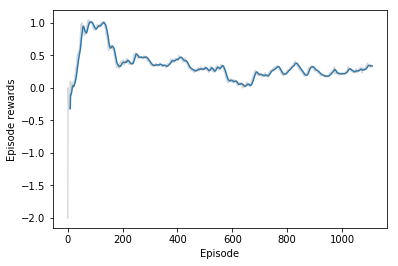

In [33]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Episode rewards')

Text(0, 0.5, 'Total rewards')

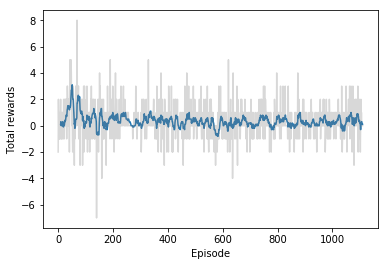

In [34]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

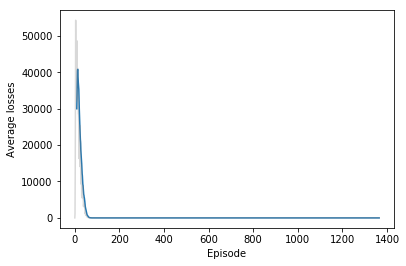

In [36]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [37]:
# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Testing episodes/epochs
    for _ in range(1):
        total_reward = 0
        #state = env.reset()
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Testing steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done:
                break
                
        print('total_reward: {:.2f}'.format(total_reward))

INFO:tensorflow:Restoring parameters from checkpoints/model-nav.ckpt


total_reward: 14.00


In [ ]:
# Be careful!!!!!!!!!!!!!!!!
# Closing the env
env.close()